In [3]:
import pandas as pd
location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias"
rer_correlation = pd.read_csv(f"{location}/1.Rerconverge_result/correlation_annotated.csv")
rer_correlation


,Name,Rho,N,P,p.adj,q_value,Pref_name
0,clock,0.216287,122,0.003708,0.150611,0.122277,clock
1,cry1a,0.113959,111,0.145038,0.565190,0.458863,cry1a
2,cry1b,0.032394,85,0.717723,0.933877,0.758190,cry1b
3,cry2,0.159814,119,0.034233,0.337970,0.274389,cry2
4,cwo,0.179292,113,0.020686,0.287323,0.233270,cwo
...,...,...,...,...,...,...,...
4566,988at7088,-0.111300,108,0.160449,0.586672,0.476303,CD109
4567,992at7088,0.068657,110,0.382152,0.771221,0.626134,992at7088
4568,993at7088,0.092394,66,0.365208,0.759361,0.616505,993at7088
4569,994at7088,-0.155708,75,0.103174,0.495906,0.402613,BZRAP1


In [14]:
negative_rho = rer_correlation[(rer_correlation["q_value"]<0.1) & (rer_correlation["Rho"]<0)]
print(len(negative_rho["Name"].values))
genes = negative_rho["Name"].values
genes

34


array(['11426at7088', '11702at7088', '15078at7088', '2418at7088',
       '2729at7088', '3887at7088', '3975at7088', '4180at7088',
       '4202at7088', '5723at7088', '6066at7088', '6782at7088',
       '6906at7088', '7001at7088', '7125at7088', '7253at7088',
       '7751at7088', '7830at7088', '8317at7088', '8504at7088',
       '8764at7088', '8898at7088', '9580at7088', '10225at7088',
       '10457at7088', '10709at7088', '1250at7088', '1490at7088',
       '2038at7088', '303at7088', '384at7088', '488at7088', '662at7088',
       '951at7088'], dtype=object)

In [16]:
import pandas as pd

location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias"

diapause = pd.read_csv(f"{location}/2.ERC_plot/ERC_correlation_full_longform.csv")



print(diapause)

                Gene1        Gene2     value
0         10716at7088  10716at7088  1.000000
1         10716at7088   2679at7088  0.229918
2         10716at7088  10214at7088  0.174992
3         10716at7088   1571at7088  0.062789
4         10716at7088  14278at7088  0.068689
...               ...          ...       ...
20859318   7001at7088     timeless  0.043614
20859319   7001at7088  10865at7088  0.023927
20859320   7001at7088   6249at7088  0.346432
20859321   7001at7088  16641at7088  0.039526
20859322   7001at7088   6620at7088  0.107467

[20859323 rows x 3 columns]


In [17]:
# genes = ["8751at7088","period","3165at7088","3811at7088","4043at7088","13263at7088","12510at7088","2560at7088","8809at7088","1846at7088","5474at7088","5423at7088","3362at7088","1709at7088","2036at7088","5326at7088","10001at7088","4842at7088","6081at7088","1390at7088","cycle","8044at7088","16035at7088","12354at7088","12730at7088","1422at7088","6031at7088","5679at7088"]

location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/unTrimmed/3.For_tree"
gene_anno_dic = {}
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/20.RERconverge/2.Modified_diapause/correlation_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0]
        # print(gene_name)
        anno_name = lines.split(",")[-1].replace('"', '')
        gene_anno_dic[gene_name]= anno_name.strip()

filtered_df = diapause[diapause['Gene1'].isin(genes)& diapause['Gene2'].isin(genes)]
filtered_df

,Gene1,Gene2,value
269362,488at7088,15078at7088,0.127605
269553,488at7088,951at7088,0.233956
269900,488at7088,2418at7088,0.178326
269982,488at7088,11702at7088,0.080853
270063,488at7088,10225at7088,0.004331
...,...,...,...
20859034,7001at7088,7751at7088,-0.020507
20859123,7001at7088,3887at7088,0.028038
20859137,7001at7088,4202at7088,0.005604
20859172,7001at7088,8764at7088,0.084386


In [18]:
# filtered_df = filtered_df.rename(columns={"Gene2": "Correlation"})
# filtered_df = filtered_df.rename(columns={"Gene1": "Gene2"})
filtered_df = filtered_df.rename(columns={"value": "Correlation"})

def check_annotation(name):
    return gene_anno_dic.get(name, name)

filtered_df["Annotation_gene1"] = filtered_df["Gene1"].apply(check_annotation)
filtered_df["Annotation_gene2"] = filtered_df["Gene2"].apply(check_annotation)


# filtered_df = filtered_df.drop('Unnamed: 0', axis=1)
filtered_df["Correlation"].fillna(1, inplace=True)
print(filtered_df)

               Gene1        Gene2  Correlation Annotation_gene1  \
269362     488at7088  15078at7088     0.127605           ANKS1A   
269553     488at7088    951at7088     0.233956           ANKS1A   
269900     488at7088   2418at7088     0.178326           ANKS1A   
269982     488at7088  11702at7088     0.080853           ANKS1A   
270063     488at7088  10225at7088     0.004331           ANKS1A   
...              ...          ...          ...              ...   
20859034  7001at7088   7751at7088    -0.020507           CCDC64   
20859123  7001at7088   3887at7088     0.028038           CCDC64   
20859137  7001at7088   4202at7088     0.005604           CCDC64   
20859172  7001at7088   8764at7088     0.084386           CCDC64   
20859248  7001at7088   2038at7088     0.054546           CCDC64   

         Annotation_gene2  
269362        15078at7088  
269553          951at7088  
269900                mwh  
269982              PTPLB  
270063               MTAP  
...                   ...  

In [ ]:
df_filled = df.fillna(1)

Annotation_gene2            10457at7088  11426at7088  15078at7088  2038at7088  \
Annotation_gene1                                                                
                  1.000000    -0.053296     0.154064     0.172381    0.046922   
10457at7088      -0.053296     1.000000     0.190103     0.182147    0.298501   
11426at7088       0.154064     0.190103     1.000000     0.122834    0.285922   
15078at7088       0.172381     0.182147     0.122834     1.000000    0.156745   
2038at7088        0.046922     0.298501     0.285922     0.156745    1.000000   
2729at7088        0.249843     0.137732     0.148851     0.269206    0.281163   
3887at7088        0.167777     0.234498     0.398813     0.413569    0.345970   
5723at7088        0.089925     0.200198     0.303512    -0.017929    0.188999   
6066at7088        0.320607     0.153492     0.201898     0.267419    0.065305   
662at7088         0.384277     0.191715     0.251557     0.345035    0.179919   
7253at7088        0.076330  

AttributeError: 'ClusterGrid' object has no attribute 'set_xticklabels'

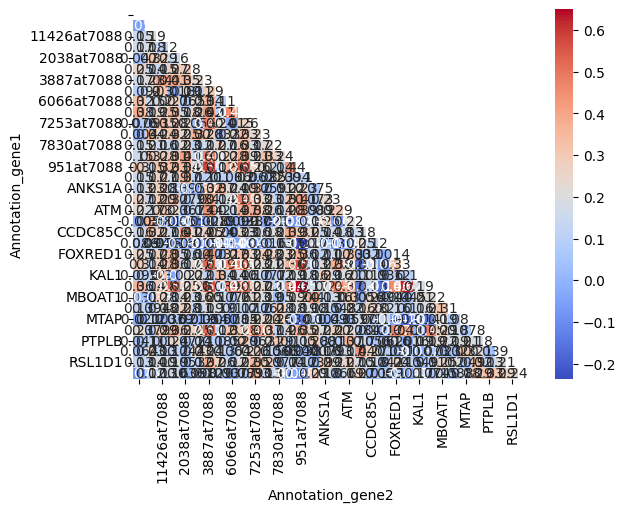

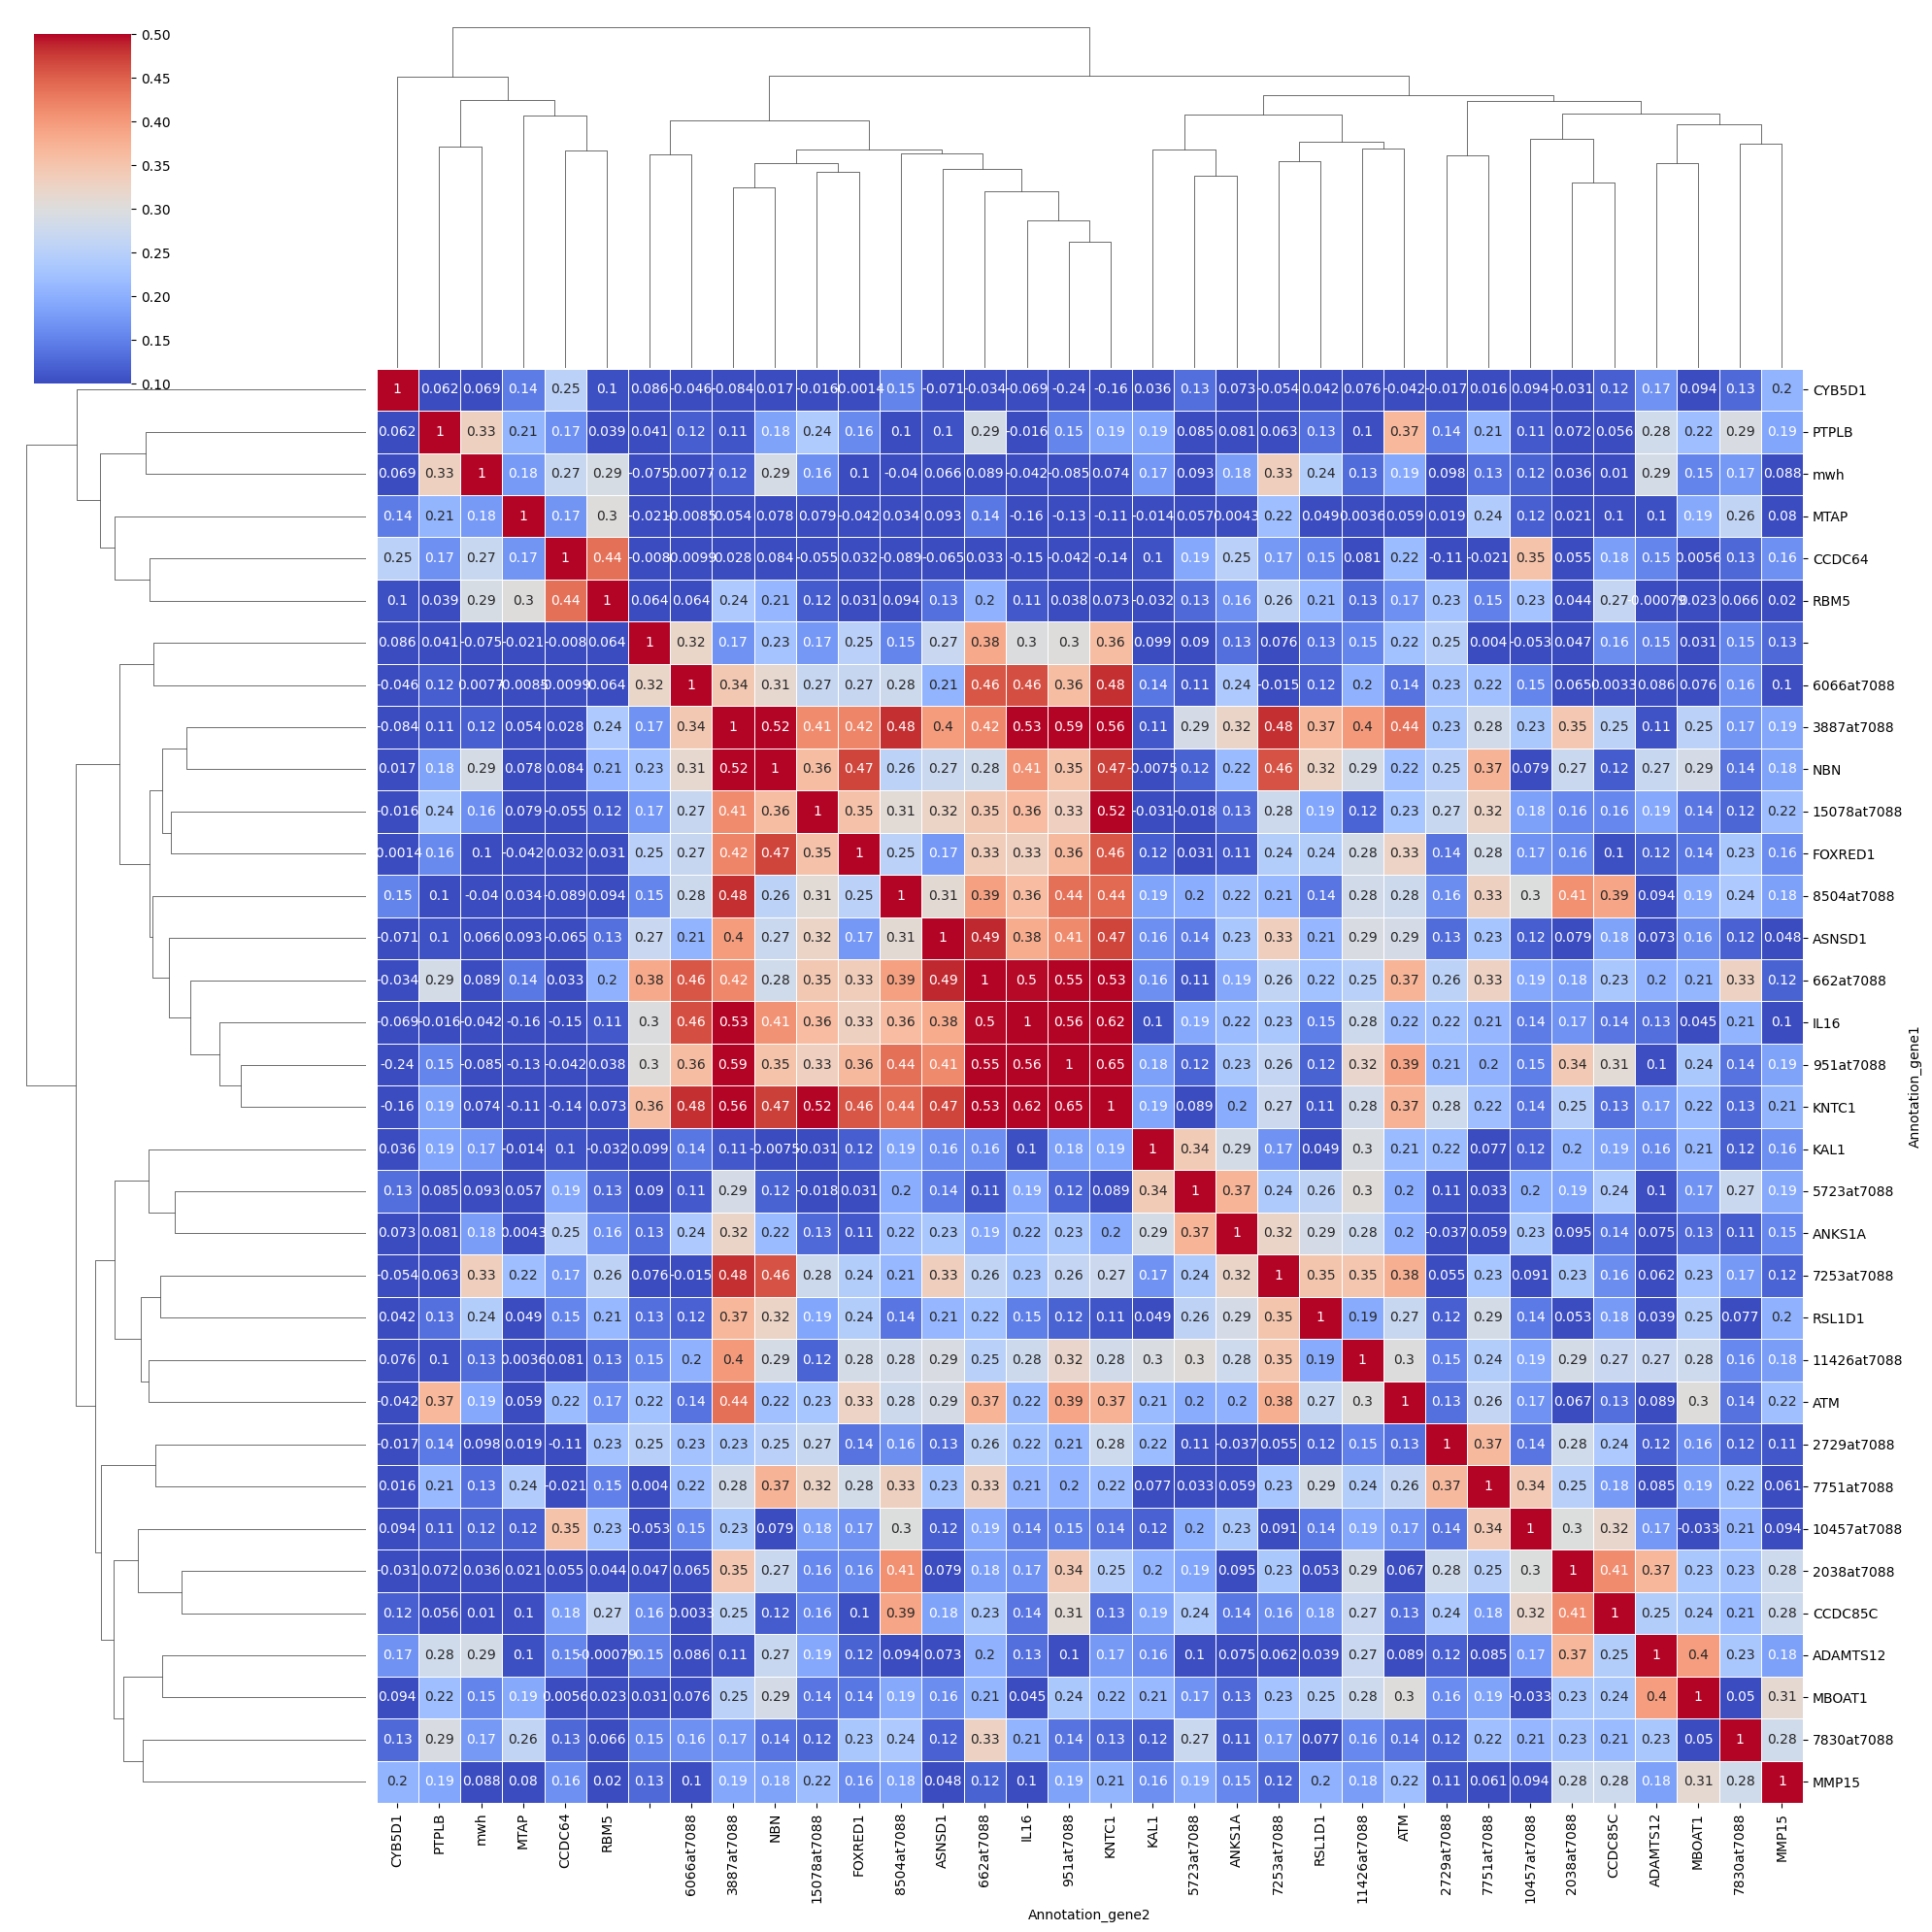

In [19]:
filtered_df_can_list_pivot = filtered_df.pivot(index="Annotation_gene1", columns="Annotation_gene2", values="Correlation")

filtered_df_can_list_pivot = filtered_df_can_list_pivot.fillna(1)
print(filtered_df_can_list_pivot)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# mask =np.triu(np.ones_like(filtered_df_can_list_pivot, dtype=bool))

# Create clustered heatmap with masking
# 
# sns.clustermap(filtered_df_can_list_pivot, cmap="coolwarm", annot=True,mask=mask, linewidths=0.5, figsize=(8, 6))


mask = np.triu(np.ones_like(filtered_df_can_list_pivot, dtype=bool))
# plt.figure(figsize=(8, 8))

ax = sns.heatmap(filtered_df_can_list_pivot, mask=mask, annot=True, cmap='coolwarm', cbar=True)

ax = sns.clustermap(filtered_df_can_list_pivot, cmap="coolwarm", vmin=0.1, vmax=0.5, annot=True, linewidths=0.5, figsize=(20, 20))

# ax.savefig("/mnt/g/My Drive/Circadian Rhythm Genes Project/61.New_alignment_colias/2ERC_plot from  old/clustermap_output.pdf", format="pdf", bbox_inches='tight')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')  # Vertical x-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right') 

ax.set_xlabel("Gene 1", fontsize=12)
ax.set_ylabel("Gene 2", fontsize=12)

In [80]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your correlation matrix
# df = pd.read_csv('correlation_matrix.csv', index_col=0)

# Create graph
G = nx.Graph()

# Add nodes
genes = filtered_df_can_list_pivot.columns.tolist()
G.add_nodes_from(genes)

# Add edges based on correlation threshold
threshold = 0.4
for i in range(len(filtered_df_can_list_pivot)):
    for j in range(i+1, len(filtered_df_can_list_pivot)):
        gene1 = filtered_df_can_list_pivot.index[i]
        gene2 = filtered_df_can_list_pivot.columns[j]
        corr = filtered_df_can_list_pivot.iloc[i, j]
        if abs(corr) >= threshold:
            G.add_edge(gene1, gene2, weight=corr)

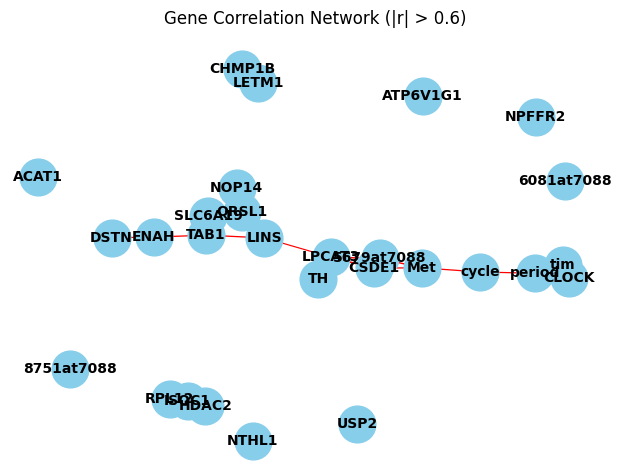

In [37]:
# Set node positions using a layout (e.g. spring layout)
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)

# Draw edges (color based on correlation sign)
edges = G.edges(data=True)
edge_colors = ['red' if d['weight'] > 0 else 'blue' for (_, _, d) in edges]
edge_weights = [abs(d['weight']) * 2 for (_, _, d) in edges]  # scale line width

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_weights)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Gene Correlation Network (|r| > 0.6)")
plt.axis('off')
plt.tight_layout()
plt.show()

In [82]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Load the correlation matrix
df = filtered_df_can_list_pivot

# Create graph with thresholded edges
G = nx.Graph()
G.add_nodes_from(df.columns)
threshold = 0.4

for i in range(len(df)):
    for j in range(i+1, len(df.columns)):
        gene1 = df.index[i]
        gene2 = df.columns[j]
        weight = df.iloc[i, j]
        if abs(weight) >= threshold:
            G.add_edge(gene1, gene2, weight=weight)

# Generate layout
pos = nx.spring_layout(G, seed=42)

# Extract node and edge positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

# Edge traces
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='gray'),
    hoverinfo='none',
    mode='lines'
)

# Node traces
node_x = []
node_y = []
node_text = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color='skyblue',
        size=15,
        line_width=2
    )
)



edge_label_x = []
edge_label_y = []
edge_label_text = []

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    mid_x = (x0 + x1) / 2
    mid_y = (y0 + y1) / 2
    edge_label_x.append(mid_x)
    edge_label_y.append(mid_y)
    edge_label_text.append(f"{edge[2]['weight']:.2f}")

# Scatter trace for edge labels
edge_label_trace = go.Scatter(
    x=edge_label_x,
    y=edge_label_y,
    text=edge_label_text,
    mode='text',
    textfont=dict(color='black', size=10),
    hoverinfo='none',
    showlegend=False
)

# Build the figure
# fig = go.Figure(data=[edge_trace, node_trace],
#     layout=go.Layout(
#         title=dict(
#             text='Interactive Gene Correlation Network (|r| > 0.6)',
#             font=dict(size=16)
#         ),
#         showlegend=False,
#         hovermode='closest',
#         margin=dict(b=20, l=5, r=5, t=40),
#         xaxis=dict(showgrid=False, zeroline=False),
#         yaxis=dict(showgrid=False, zeroline=False)
#     )
# )


fig = go.Figure(data=[edge_trace, edge_label_trace, node_trace],
    layout=go.Layout(
        title=dict(
            text=f'Interactive Gene Correlation Network (|r| > {threshold})',
            font=dict(size=16)
        ),
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

fig.show()

fig.write_html(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/61.New_alignment_colias/2ERC_plot from  old/correlation_network_new_{threshold}.html")